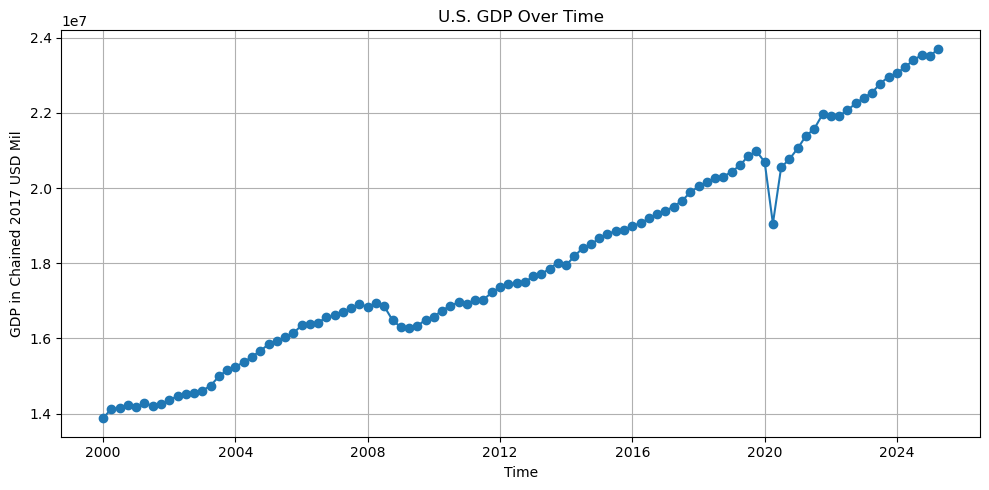

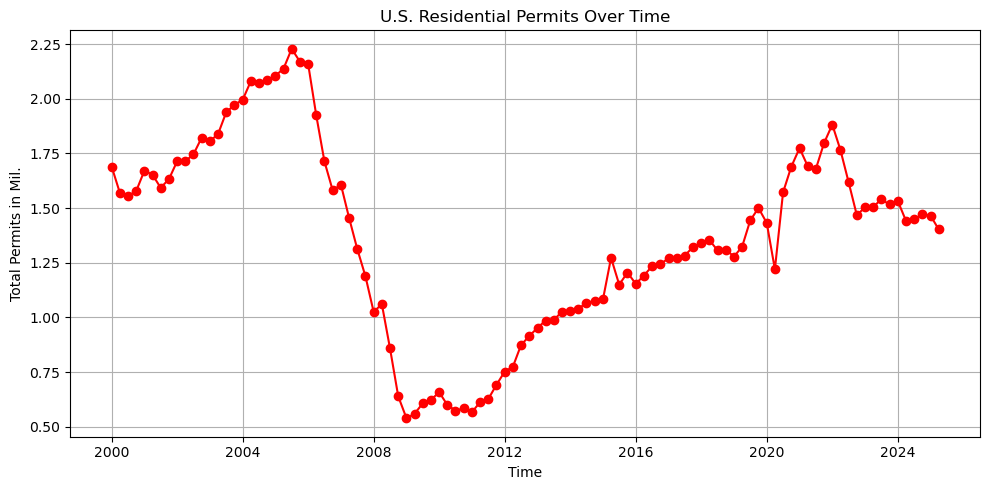

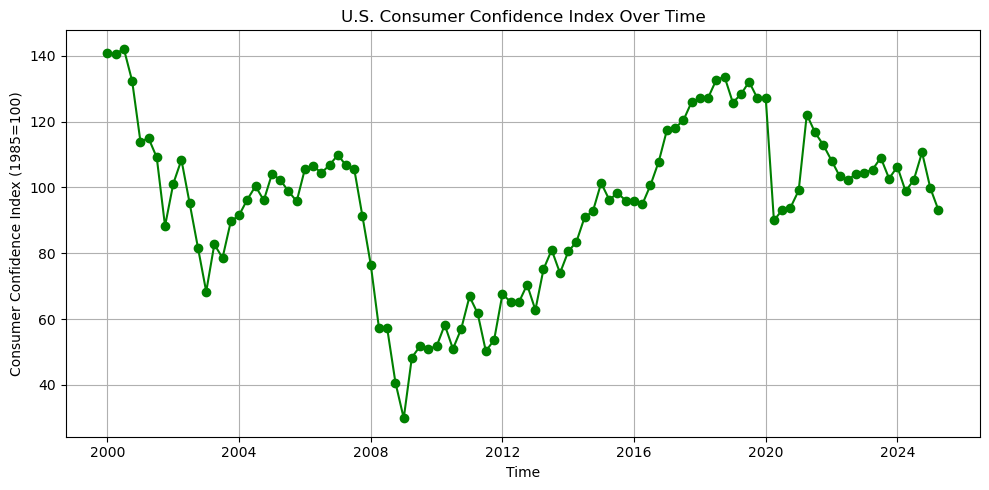

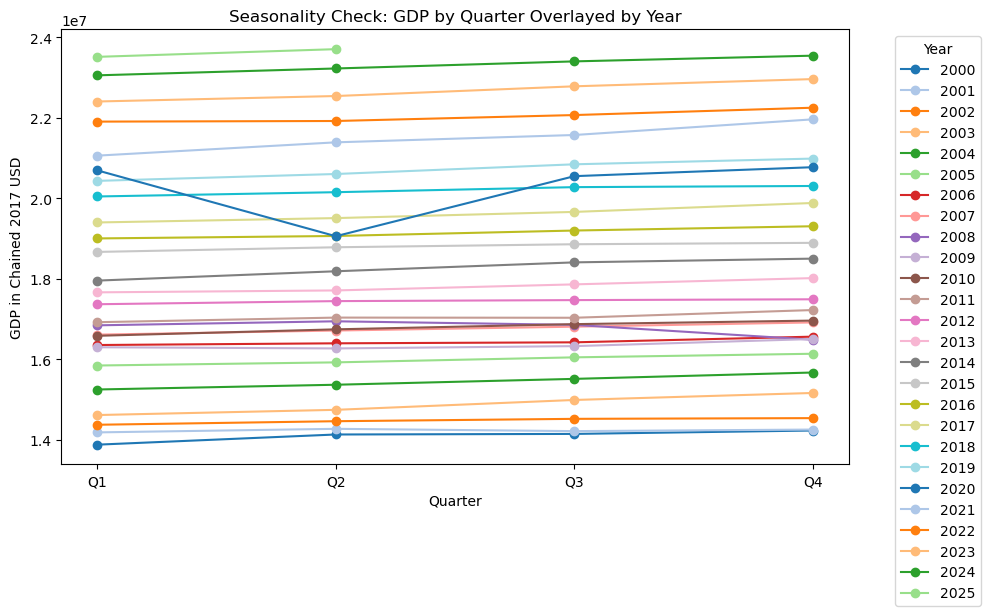

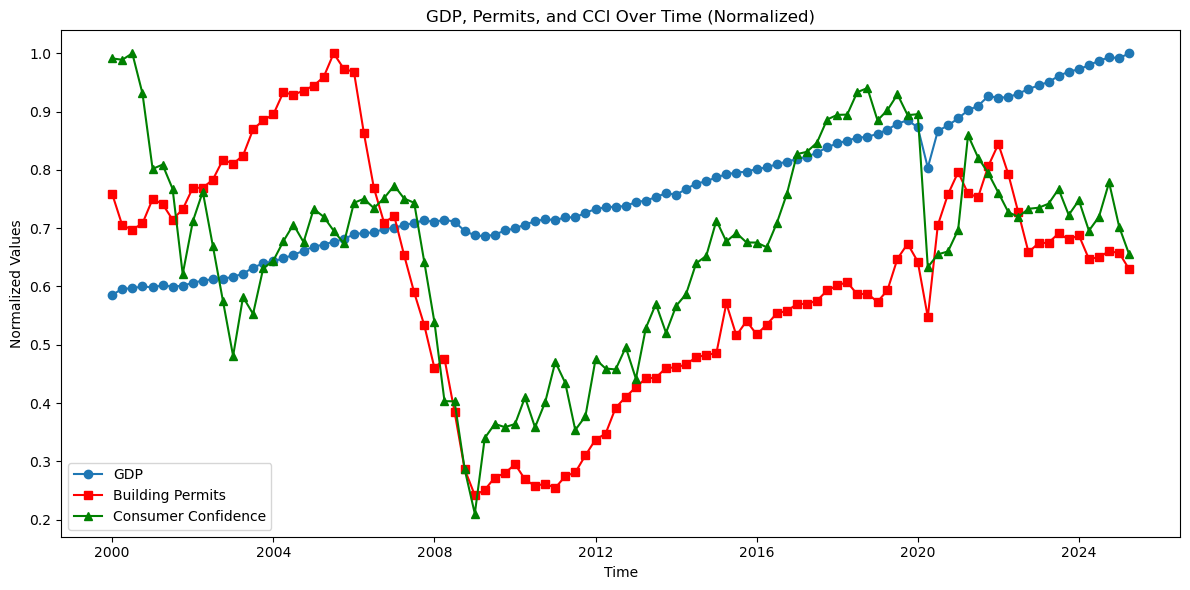

In [523]:
###Case study to forecast GDP with two predictor variables

#loading in data
import csv
import pandas as pd
gdp_df = pd.read_csv('/Users/liadougherty/Desktop/GDP.csv')
perm_df = pd.read_csv('/Users/liadougherty/Desktop/Permits.csv')
cci_df = pd.read_csv('/Users/liadougherty/Desktop/CCI.csv')

#graphing data
import pandas as pd
import matplotlib.pyplot as plt

#GDP
#plot over time 
gdp_df = gdp_df.dropna(subset=['Time', 'GDP'])

#converting to datetime
gdp_df['Time'] = pd.PeriodIndex(gdp_df['Time'], freq='Q').to_timestamp()
gdp_df = gdp_df.sort_values('Time')

plt.figure(figsize=(10,5))
plt.plot(gdp_df['Time'], gdp_df['GDP'], marker='o', linestyle='-')
plt.title('U.S. GDP Over Time')
plt.xlabel('Time')
plt.ylabel('GDP in Chained 2017 USD Mil')
plt.grid(True)
plt.tight_layout() 
plt.show()


#PERMITS
#plot over time 

#converting to datetime
perm_df['Time'] = pd.PeriodIndex(perm_df['Time'], freq='Q').to_timestamp()
perm_df = perm_df.sort_values('Time')

plt.figure(figsize=(10,5))
plt.plot(perm_df['Time'], perm_df['Building Permits'], marker='o', linestyle='-', color='red')
plt.title('U.S. Residential Permits Over Time')
plt.xlabel('Time')
plt.ylabel('Total Permits in Mil.')
plt.grid(True)
plt.tight_layout() 
plt.show()

#CCI
#converting to datetime
cci_df['Time'] = pd.PeriodIndex(cci_df['Time'], freq='Q').to_timestamp()
cci_df = cci_df.sort_values('Time')

plt.figure(figsize=(10,5))
plt.plot(cci_df['Time'], cci_df['CCI'], marker='o', linestyle='-', color='green')
plt.title('U.S. Consumer Confidence Index Over Time')
plt.xlabel('Time')
plt.ylabel('Consumer Confidence Index (1985=100)')
plt.grid(True)
plt.tight_layout() 
plt.show()

#GDP
#seasonal plot by year
gdp_df['Year'] = gdp_df['Time'].dt.year
gdp_df['Quarter'] = gdp_df['Time'].dt.quarter

plt.figure(figsize=(10,6))

colors = plt.cm.tab20.colors 
unique_years = gdp_df['Year'].unique()

for i, year in enumerate(unique_years):
    year_data = gdp_df[gdp_df['Year'] == year]
    plt.plot(year_data['Quarter'], year_data['GDP'], 
             marker='o', linestyle='-', color=colors[i % len(colors)], label=str(year))

plt.xticks([1,2,3,4], ['Q1','Q2','Q3','Q4'])
plt.xlabel('Quarter')
plt.ylabel('GDP in Chained 2017 USD')
plt.title('Seasonality Check: GDP by Quarter Overlayed by Year')
plt.legend(title='Year', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()


#correlations
gdp_df['Time'] = pd.PeriodIndex(gdp_df['Time'], freq='Q').to_timestamp()
perm_df['Time'] = pd.PeriodIndex(perm_df['Time'], freq='Q').to_timestamp()
cci_df['Time'] = pd.PeriodIndex(cci_df['Time'], freq='Q').to_timestamp()

merged_df = pd.merge(gdp_df[['Time', 'GDP']], 
                     perm_df[['Time', 'Building Permits']], 
                     left_on='Time', right_on='Time', how='inner')
merged_df = pd.merge(merged_df, 
                     cci_df[['Time', 'CCI']], 
                     left_on='Time', right_on='Time', how='inner')

merged_df['GDP_norm'] = merged_df['GDP'] / merged_df['GDP'].max()
merged_df['Permits_norm'] = merged_df['Building Permits'] / merged_df['Building Permits'].max()
merged_df['CCI_norm'] = merged_df['CCI'] / merged_df['CCI'].max()

#plot
plt.figure(figsize=(12,6))
plt.plot(merged_df['Time'], merged_df['GDP_norm'], marker='o', linestyle='-', label='GDP')
plt.plot(merged_df['Time'], merged_df['Permits_norm'], marker='s', linestyle='-', color = 'red', label='Building Permits')
plt.plot(merged_df['Time'], merged_df['CCI_norm'], marker='^', linestyle='-', color = 'green', label='Consumer Confidence')

plt.xlabel('Time')
plt.ylabel('Normalized Values')
plt.title('GDP, Permits, and CCI Over Time (Normalized)')
plt.legend()
plt.tight_layout()
plt.show()



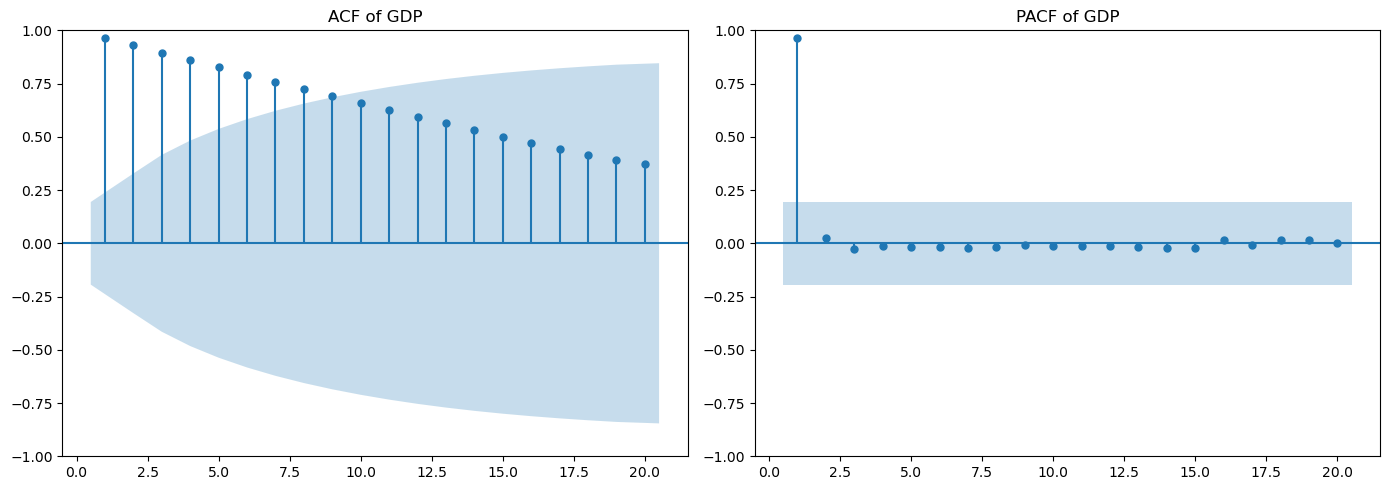

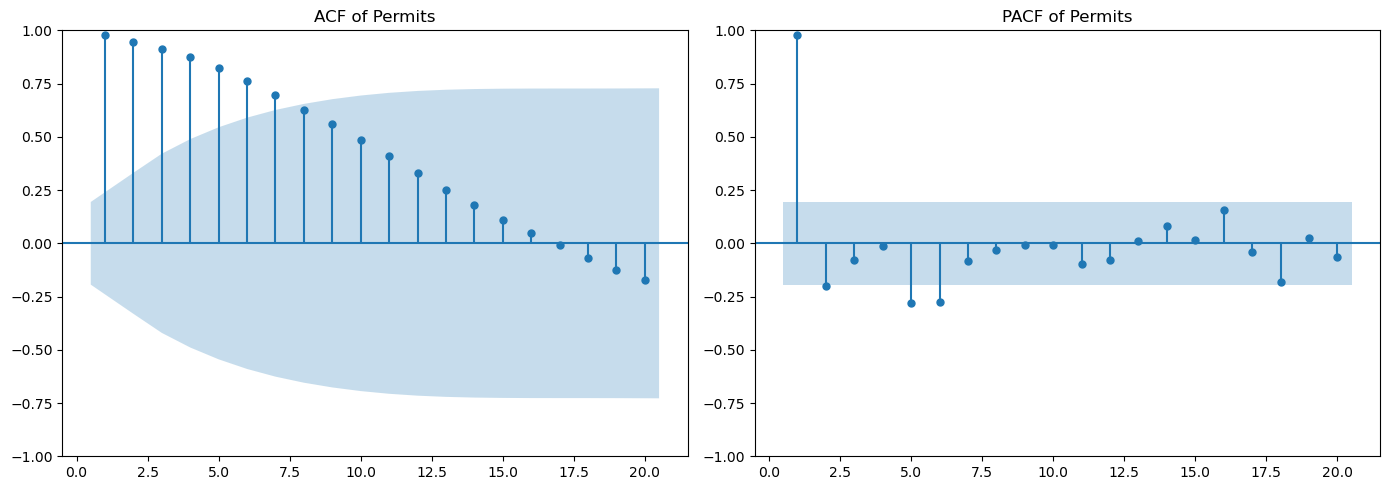

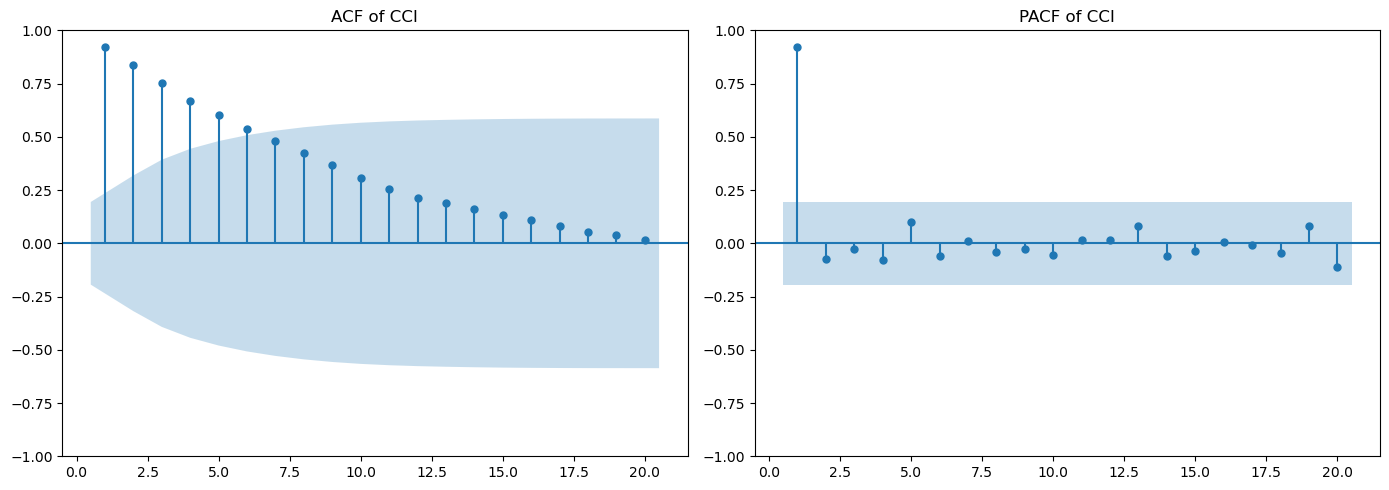

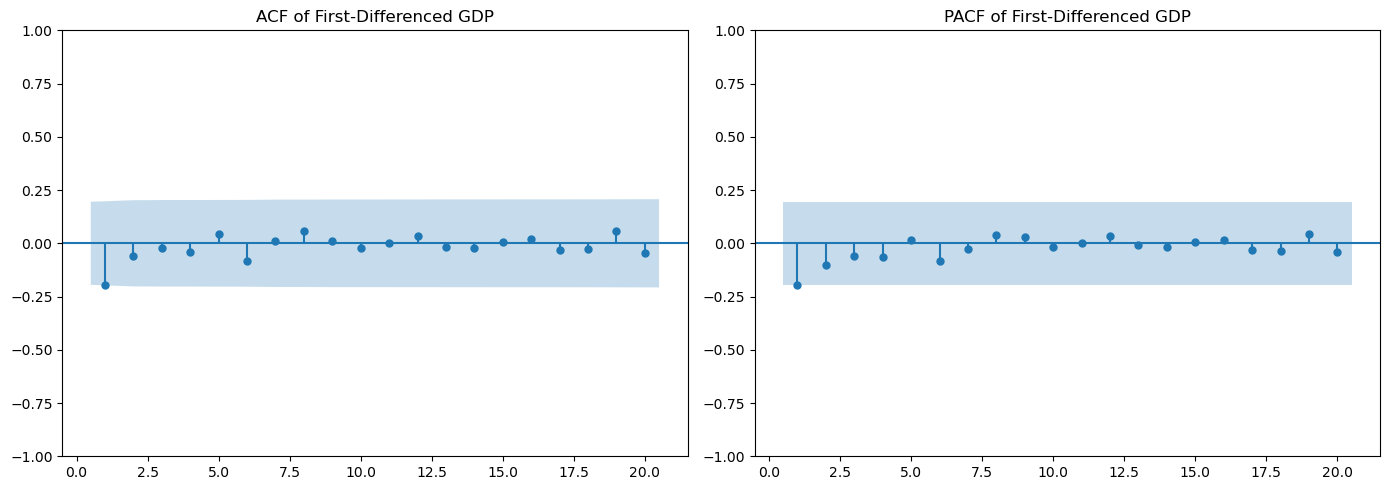

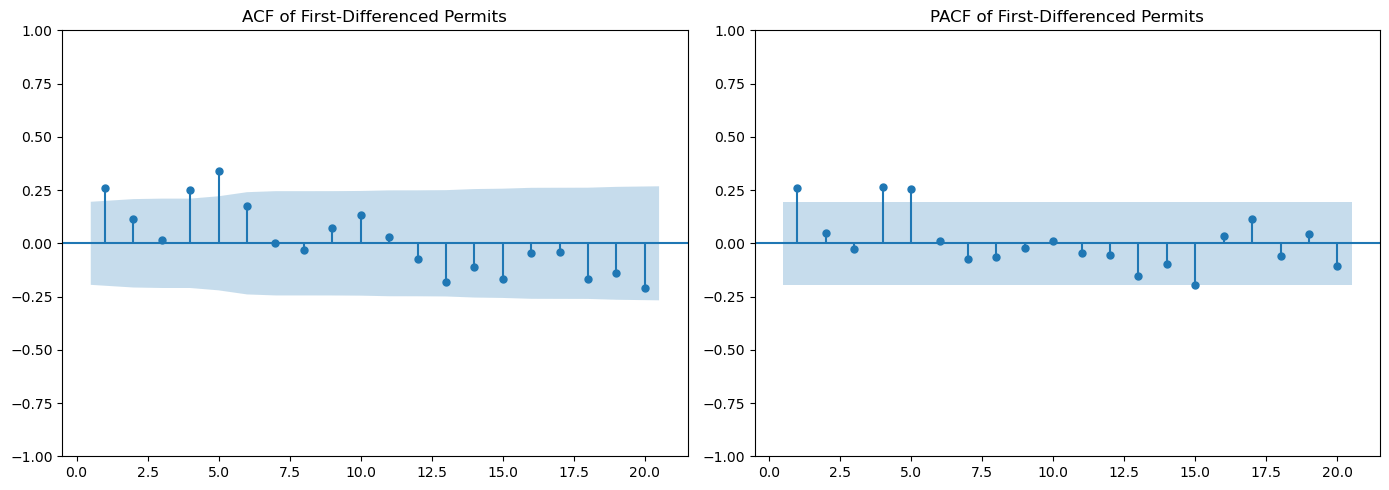

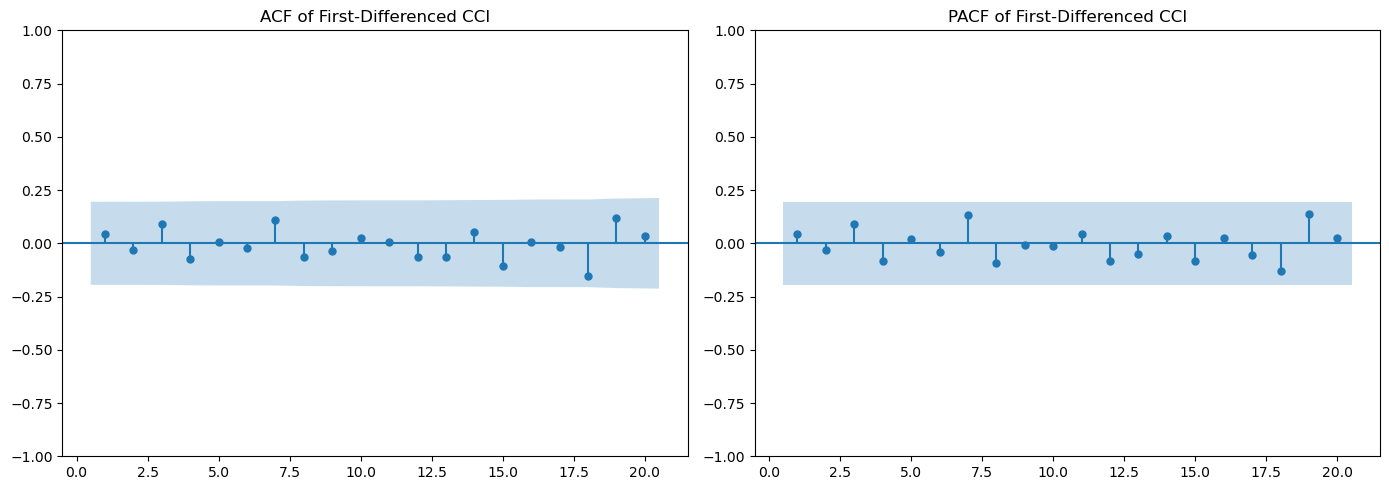

In [525]:


# ACF, PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


#GDP
gdp_series = gdp_df['GDP']
fig, axes = plt.subplots(1, 2, figsize=(14,5))

#acf
plot_acf(gdp_series, lags=20, ax=axes[0], zero=False)
axes[0].set_title('ACF of GDP')

#pacf
plot_pacf(gdp_series, lags=20, method='ywm', ax=axes[1], zero=False)
axes[1].set_title('PACF of GDP')

plt.tight_layout()
plt.show()


#PERM
perm_series = pd.to_numeric(perm_df['Building Permits'], errors='coerce').dropna()

fig, axes = plt.subplots(1, 2, figsize=(14,5))
plot_acf(perm_series, lags=20, ax=axes[0], zero=False)
axes[0].set_title('ACF of Permits')
plot_pacf(perm_series, lags=20, method='ywm', ax=axes[1], zero=False)
axes[1].set_title('PACF of Permits')

plt.tight_layout()
plt.show()


#CCI
cci_series = pd.to_numeric(cci_df['CCI'], errors='coerce').dropna()
fig, axes = plt.subplots(1, 2, figsize=(14,5))
plot_acf(cci_series, lags=20, ax=axes[0], zero=False)
axes[0].set_title('ACF of CCI')
plot_pacf(cci_series, lags=20, method='ywm', ax=axes[1], zero=False)
axes[1].set_title('PACF of CCI')

plt.tight_layout()
plt.show()


#first difference GDP 

gdp_diff = gdp_series.diff().dropna()
fig, axes = plt.subplots(1, 2, figsize=(14,5))
plot_acf(gdp_diff, lags=20, ax=axes[0], zero=False)
axes[0].set_title('ACF of First-Differenced GDP')
plot_pacf(gdp_diff, lags=20, method='ywm', ax=axes[1], zero=False)
axes[1].set_title('PACF of First-Differenced GDP')

plt.tight_layout()
plt.show()



#first difference PERM
perm_diff = perm_series.diff().dropna()
fig, axes = plt.subplots(1, 2, figsize=(14,5))
plot_acf(perm_diff, lags=20, ax=axes[0], zero=False)
axes[0].set_title('ACF of First-Differenced Permits')
plot_pacf(perm_diff, lags=20, method='ywm', ax=axes[1], zero=False)
axes[1].set_title('PACF of First-Differenced Permits')

plt.tight_layout()
plt.show()


#first difference CCI
cci_diff = cci_series.diff().dropna()
fig, axes = plt.subplots(1, 2, figsize=(14,5))
plot_acf(cci_diff, lags=20, ax=axes[0], zero=False)
axes[0].set_title('ACF of First-Differenced CCI')
plot_pacf(cci_diff, lags=20, method='ywm', ax=axes[1], zero=False)
axes[1].set_title('PACF of First-Differenced CCI')

plt.tight_layout()
plt.show()



In [527]:
from statsmodels.tsa.stattools import kpss
import pandas as pd


# dictionary
series_dict = {
    'GDP': gdp_diff,
    'Permits': perm_diff,
    'CCI': cci_diff
}

#store results
results = []

for name, series in series_dict.items():
    kpss_stat, p_value, lags, critical_values = kpss(series, regression='c', nlags='auto')
    results.append({
        'Series': name,
        'KPSS Statistic': round(kpss_stat, 4),
        'p-value': round(p_value, 4),
        'Stationary?': 'Yes' if p_value > 0.05 else 'No'
    })
    
kpss_table = pd.DataFrame(results)
output_path = '/Users/liadougherty/Desktop/KPSS_summary.csv'
kpss_table.to_csv(output_path, index=False)

print(f"KPSS summary exported to: {output_path}")


KPSS summary exported to: /Users/liadougherty/Desktop/KPSS_summary.csv


                               SARIMAX Results                                
Dep. Variable:                    GDP   No. Observations:                  101
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1555.956
Date:                Fri, 26 Sep 2025   AIC                           3117.912
Time:                        08:04:00   BIC                           3125.728
Sample:                             0   HQIC                          3121.075
                                - 101                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CCI         7567.5385   1.22e+05      0.062      0.950   -2.31e+05    2.46e+05
Permits     8.256e+05   1.48e+07      0.056      0.955   -2.81e+07    2.98e+07
sigma2      5.156e+12   1.04e+12      4.951      0.0

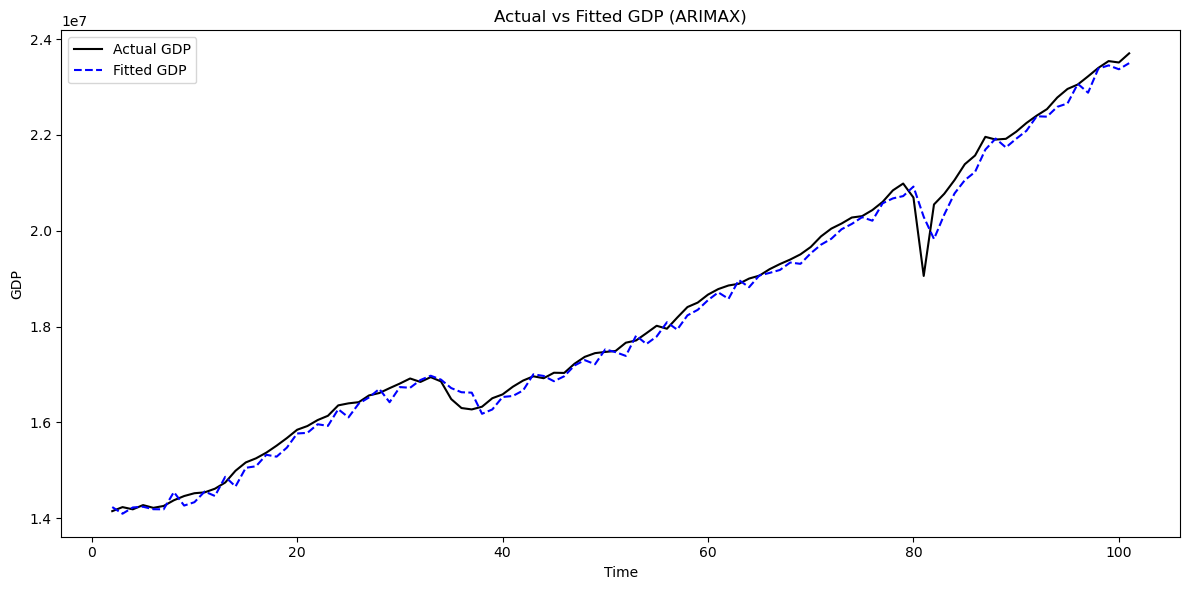

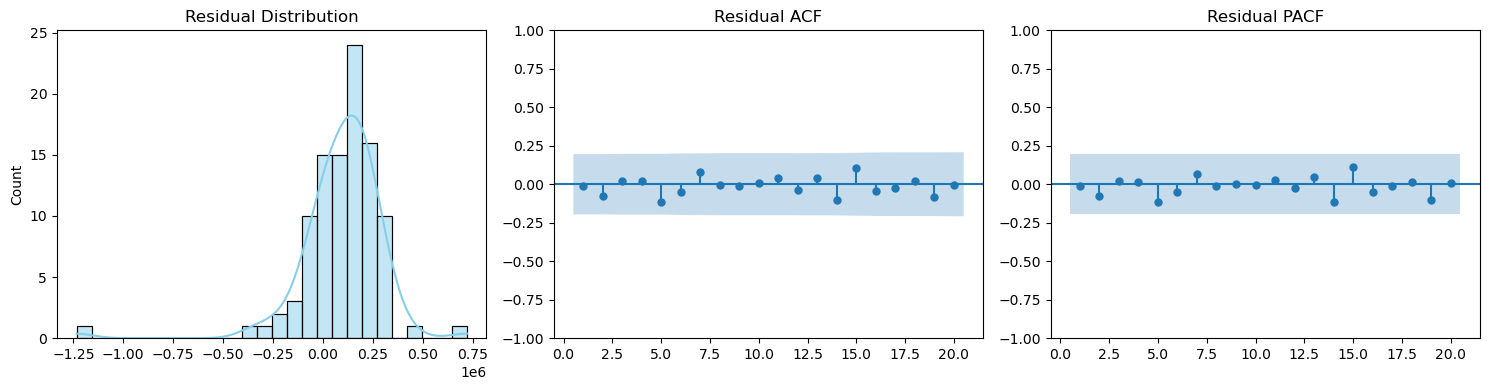

  Metric         Value
     AIC   3118.333420
    RMSE 227075.584077
     MAE 165620.250712
MAPE (%)      0.906426


In [648]:

#ARIMAX MODEL

y = gdp_df['GDP'].dropna()
cci = cci_df['CCI'].dropna()
perm = perm_df['Building Permits'].dropna()

cci_diff = cci.diff().dropna()
perm_diff = perm.diff().dropna()

merged = pd.concat([y, cci_diff, perm_diff], axis=1).dropna()
merged.columns = ['GDP', 'CCI', 'Permits']

#stepwise search for best model

def stepwise_arimax(series, exog, d=1):
    best_aicc = np.inf
    best_model = None
    
    initial_orders = [
        (0,d,0),
        (2,d,2),
        (1,d,0),
        (0,d,1),
        (0,d,0)  
    ]
    
    for order in initial_orders:
        try:
            trend_type = 'c' if order != (0,d,0) else 'n'
            model = ARIMA(series, exog=exog, order=order, trend=trend_type).fit()
            k = order[0] + order[2] + (exog.shape[1] if exog is not None else 0) + (1 if trend_type=='c' else 0)
            n = len(series)
            aicc = model.aic + (2*k*(k+1)) / (n - k - 1)
            
            if aicc < best_aicc:
                best_aicc = aicc
                best_model = model
        except:
            continue
    return best_model


best_arimax = stepwise_arimax(merged['GDP'], merged[['CCI','Permits']], d=1)
print(best_arimax.summary())

#fitted values 
y = merged['GDP'].drop(merged.index[0])  
#dropping first obs bc of differencing

y_fitted = best_arimax.fittedvalues
y_fitted = y_fitted.iloc[1:]

#aligning series
y_aligned = y.loc[y_fitted.index]

#plot of actual vs fitted data

plt.figure(figsize=(12,6))
plt.plot(y_aligned.index, y_aligned, label='Actual GDP', color='black')
plt.plot(y_fitted.index, y_fitted, label='Fitted GDP', color='blue', linestyle='--')
plt.title('Actual vs Fitted GDP (ARIMAX)')
plt.xlabel('Time')
plt.ylabel('GDP')
plt.legend()
plt.tight_layout()
plt.show()


#residual anaysis
fig, axes = plt.subplots(1,3,figsize=(15,4))
sns.histplot(resid, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Residual Distribution')
plot_acf(resid, lags=20, ax=axes[1], zero=False)
axes[1].set_title('Residual ACF')
plot_pacf(resid, lags=20, method='ywm', ax=axes[2], zero=False)
axes[2].set_title('Residual PACF')
plt.tight_layout()
plt.show()

#align 
y_aligned = merged['GDP'].drop(merged.index[0]) 

#fit metrics
mse = mean_squared_error(y_aligned, y_fitted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_aligned, y_fitted)
mape = np.mean(np.abs((y_aligned - y_fitted) / y_aligned)) * 100
AIC = best_arimax.aic

metrics = pd.DataFrame({
    'Metric': ['AIC','RMSE','MAE','MAPE (%)'],
    'Value': [AICc, rmse, mae, mape]
})
print(metrics.to_string(index=False))




101    2.381339e+07
102    2.385169e+07
103    2.382968e+07
104    2.382339e+07
105    2.382138e+07
106    2.382083e+07
107    2.382349e+07
108    2.382362e+07
109    2.382698e+07
110    2.382766e+07
111    2.382724e+07
112    2.382593e+07
113    2.382454e+07
114    2.382209e+07
115    2.382001e+07
116    2.381884e+07
117    2.381907e+07
118    2.382376e+07
Name: predicted_mean, dtype: float64
Forecast saved to: /Users/liadougherty/Desktop/Forecasted_GDP.csv
            GDP_Forecast      Lower_CI      Upper_CI
Time                                                
2025-07-01  2.567621e+07  2.122561e+07  3.012681e+07
2025-10-01  2.571451e+07  1.942042e+07  3.200861e+07
2026-01-01  2.569250e+07  1.798383e+07  3.340116e+07
2026-04-01  2.568621e+07  1.678501e+07  3.458741e+07
2026-07-01  2.568420e+07  1.573235e+07  3.563604e+07
2026-10-01  2.568365e+07  1.478196e+07  3.658535e+07
2027-01-01  2.568631e+07  1.391113e+07  3.746149e+07
2027-04-01  2.568644e+07  1.309825e+07  3.827464e+07
2027-07

<Figure size 1200x600 with 0 Axes>

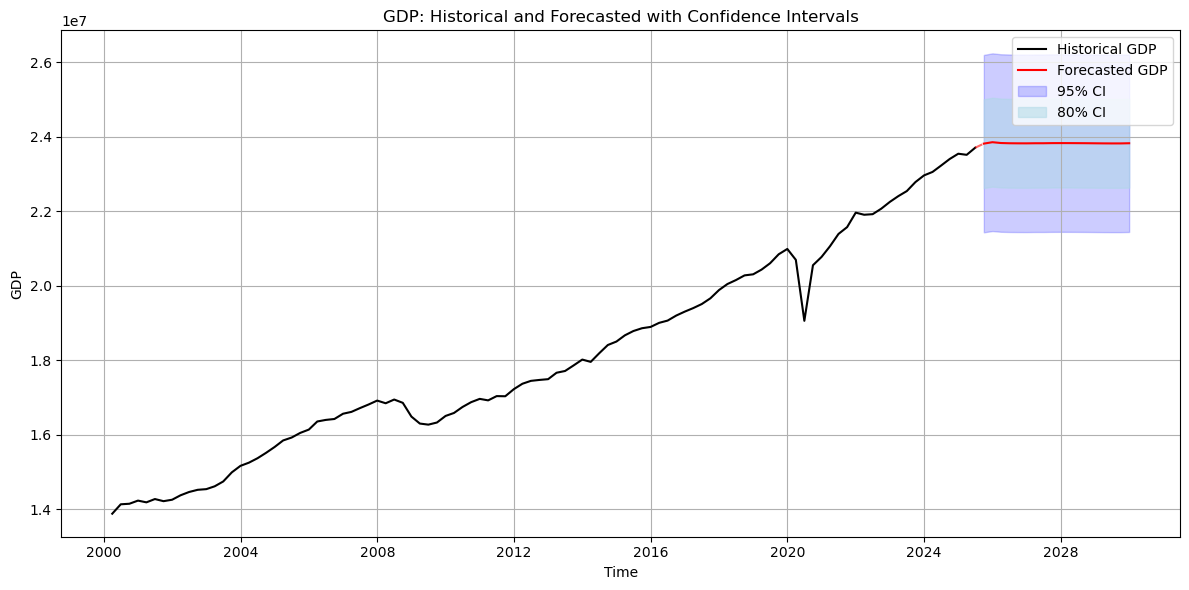

In [714]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

#producing forecasts with forecasted values of predictors

cci_forecast_df = pd.read_csv("/Users/liadougherty/Desktop/Forecast_CCI.csv")
perm_forecast_df = pd.read_csv("/Users/liadougherty/Desktop/Forecast_Permits.csv")
cci_forecasts = pd.to_numeric(cci_forecast_df.iloc[:, 1], errors='coerce').dropna().tolist()
perm_forecasts = pd.to_numeric(perm_forecast_df.iloc[:, 1], errors='coerce').dropna().tolist()

#grabbing last obs to compute difference
cci_last = cci_df['CCI'].dropna().iloc[-1]
perm_last = perm_df['Building Permits'].dropna().iloc[-1]

#compute all differences
cci_diff_future = [val - cci_last for val in cci_forecasts]
perm_diff_future = [val - perm_last for val in perm_forecasts]

future_exog_df = pd.DataFrame({
    'CCI': cci_diff_future,
    'Permits': perm_diff_future
})

#print(future_exog_df)

n_steps = len(cci_forecasts)

#producing forecast
forecast = best_arimax.forecast(steps=n_steps, exog=future_exog_df)
forecast_array = np.array(forecast)

print(forecast)
forecast_df.set_index('Time', inplace=True)
forecast_csv_path = "/Users/liadougherty/Desktop/Forecasted_GDP.csv"
forecast_df.to_csv(forecast_csv_path)

print("Forecast saved to:", forecast_csv_path)
print(forecast_df)

#confidence intervals
ci_80_lower = forecast_array * 0.95
ci_80_upper = forecast_array * 1.05
ci_95_lower = forecast_array * 0.90
ci_95_upper = forecast_array * 1.10

n_steps = len(cci_forecasts)
start_date = pd.Timestamp("2025-07-01")  
#sequential quarterly dates to recreate time index

forecast_index = pd.date_range(start=start_date, periods=n_steps, freq='Q')

plt.figure(figsize=(12,6))
#reload historical data

gdp_path = "/Users/liadougherty/Desktop/GDP.csv"
gdp_df = pd.read_csv(gdp_path)
n_hist = len(gdp_df)

#recreate datetime index starting at 2000-01-01, quarterly frequency
hist_index = pd.date_range(start="2000-01-01", periods=n_hist, freq='Q')

#aligning date index
gdp_df['Date'] = hist_index
gdp_df.set_index('Date', inplace=True)

#extract data
y = gdp_df['GDP'].dropna()

start_forecast = y.index[-1] + pd.offsets.QuarterEnd()  # first forecast quarter
forecast_index = pd.date_range(start=start_forecast, periods=n_steps, freq='Q')


#plot everything together
plt.figure(figsize=(12,6))
plt.plot(y.index, y, label='Historical GDP', color='black')
plt.plot(forecast_index, forecast_array, label='Forecasted GDP', color='red')
plt.plot([y.index[-1], forecast_index[0]], [y.iloc[-1], forecast_array[0]], color='red', linestyle='--', alpha=0.6)
plt.fill_between(forecast_index, ci_95_lower, ci_95_upper, color='blue', alpha=0.2, label='95% CI')
plt.fill_between(forecast_index, ci_80_lower, ci_80_upper, color='lightblue', alpha=0.5, label='80% CI')

plt.title('GDP: Historical and Forecasted with Confidence Intervals')
plt.xlabel('Time')
plt.ylabel('GDP')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

